In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('Automobile.csv')
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [40]:
data.dropna(inplace=True)
Q1 = data.select_dtypes(include=['number']).quantile(0.25)
Q3 = data.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (data.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | (data.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))
print("\nOutliers:")
outliers




Outliers:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False
394,False,False,False,False,False,True,False
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False


our outliers after dropping null values

In [41]:
hp_outliers = data[outliers['horsepower']]
hp_outliers

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
13,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,usa
25,ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
27,dodge d200,11.0,8,318.0,210.0,4382,13.5,70,usa
67,mercury marquis,11.0,8,429.0,208.0,4633,11.0,72,usa
94,chrysler new yorker brougham,13.0,8,440.0,215.0,4735,11.0,73,usa
95,buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,usa
116,pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,usa


In [42]:
origins = data.groupby('origin')['origin'].value_counts().reset_index()
origins

,origin,count
0,europe,68
1,japan,79
2,usa,245


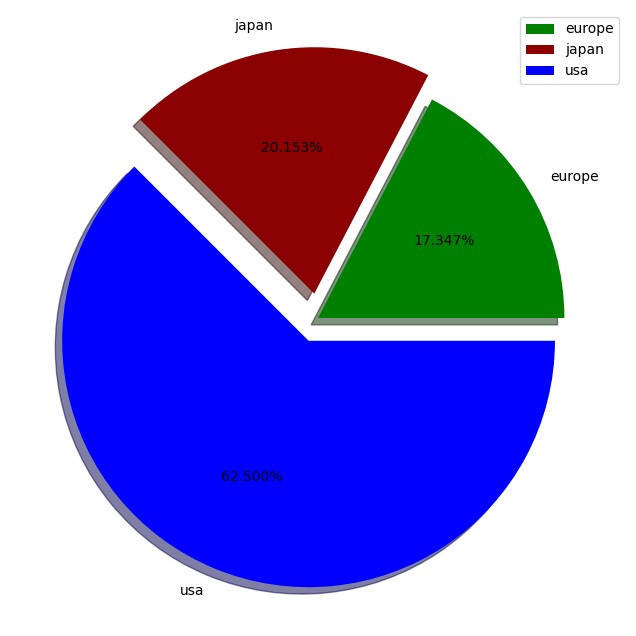

In [43]:
plt.figure(figsize=(8,8))
plt.pie(origins['count'], labels=origins['origin'],autopct='%1.3f%%',explode=[0,0.1,0.1],shadow=True,colors=['green','darkred','blue'])
plt.legend()
plt.show()

MORE CARS ARE FROM USA IN THIS DATASET

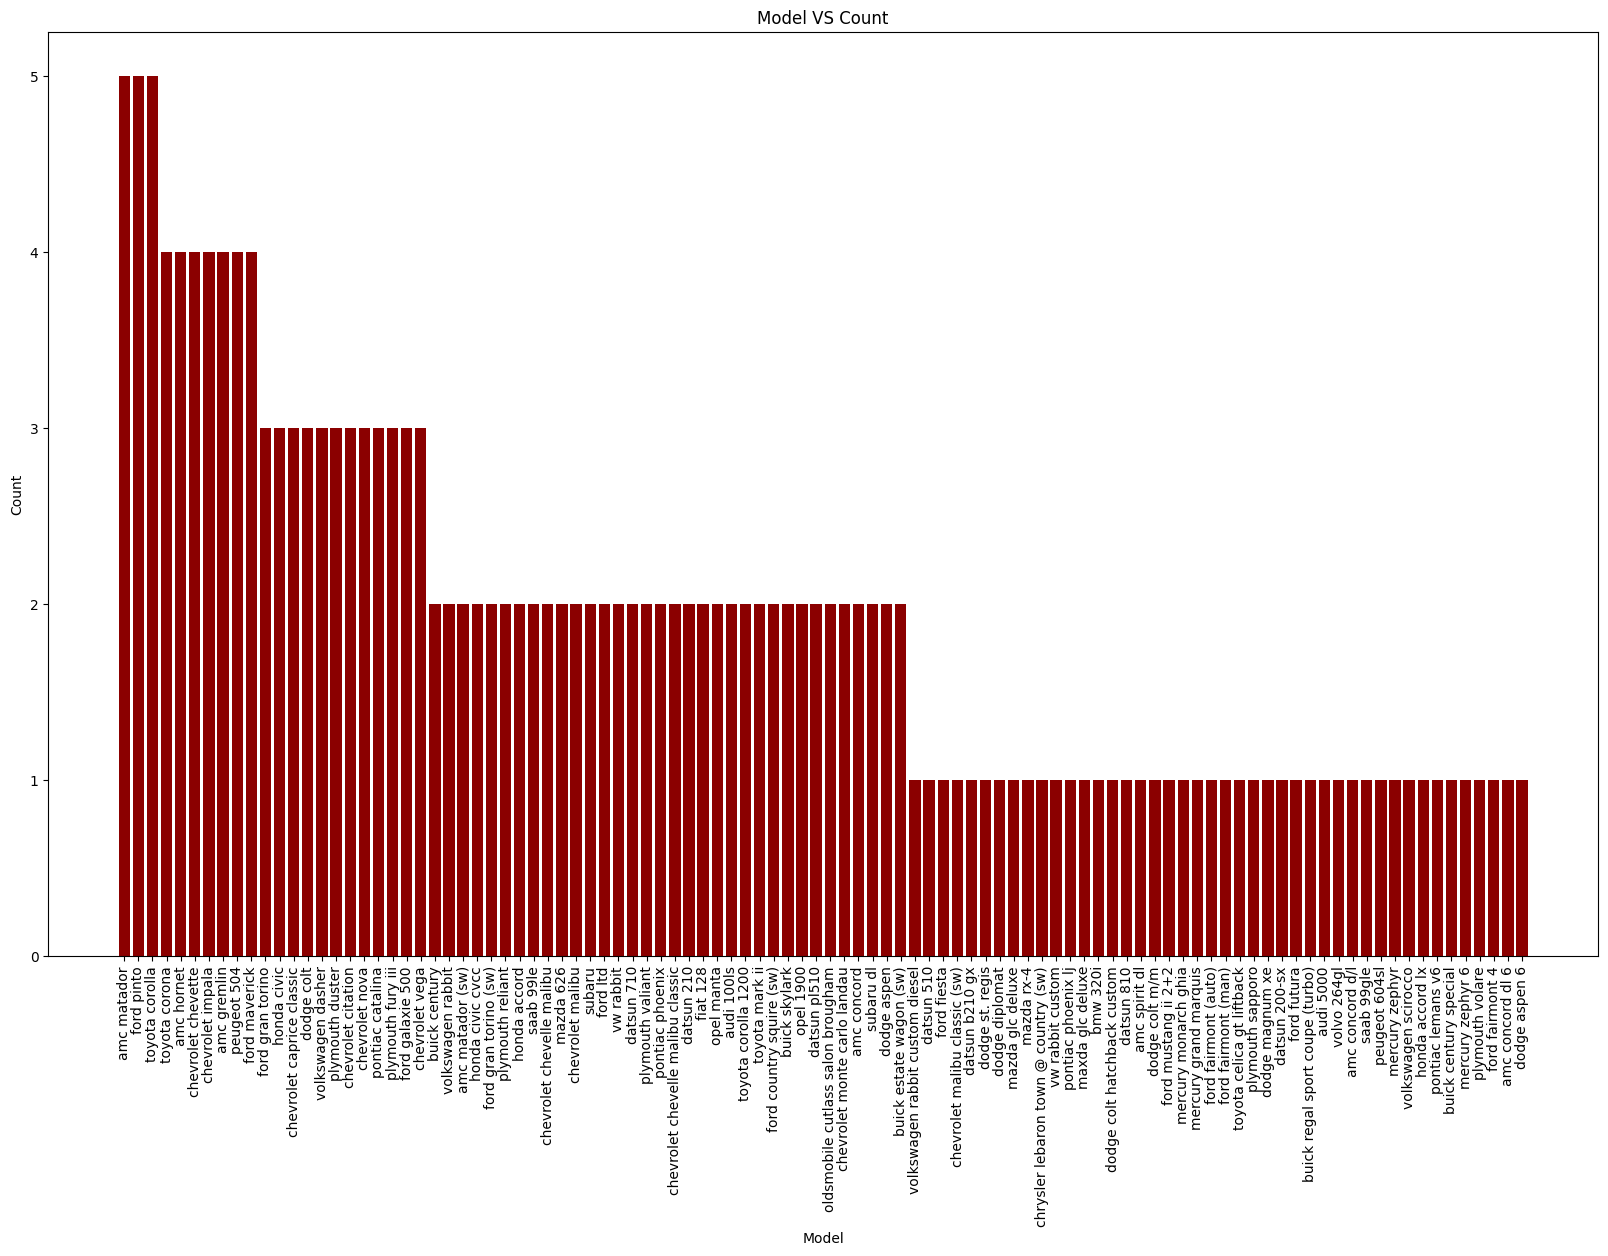

In [53]:
count_models = data['name'].value_counts().reset_index().head(100)
count_models

xticks = count_models['name']
plt.figure(figsize=(20,12))
plt.bar(count_models['name'],count_models['count'],color='darkred')
plt.xticks(xticks,rotation=90)
plt.title("Model VS Count")
plt.xlabel("Model")
plt.ylabel("Count")
plt.show()

In [60]:
origin_hp = data.groupby('origin')['horsepower'].sum()


In [61]:
origin_hp_percent = (origin_hp / origin_hp.sum()) * 100


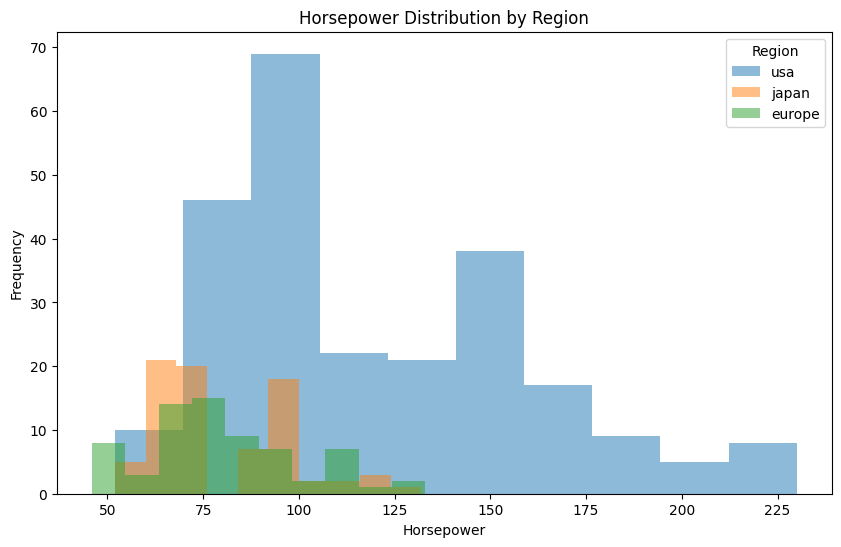

In [71]:
plt.figure(figsize=(10, 6))
regions = ['usa', 'japan', 'europe']
for region in regions:
    plt.hist(data[data['origin'] == region]['horsepower'], bins=10, alpha=0.5, label=region)

plt.title('Horsepower Distribution by Region')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.legend(title="Region")
plt.show()
